# Resolução de Exercício de Avaliação 

Este notebook contém a resolução de três questões usando métodos numéricos em Python, abordando os seguintes tópicos:

1. Método de Euler e Runge-Kutta de 3ª ordem.
2. Movimento de um projétil com resistência do ar.
3. Crescimento populacional usando a equação logística.

## Importação de Bibliotecas

In [12]:
import math
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

### Questão 1: Método de Euler e Runge-Kutta de 3ª Ordem
Calcular o valor de y(1) usando os métodos de Euler e Runge-Kutta de 3ª ordem.
E calcular o erro absoluto erro absoluto cometido na aproximação de y (1) usando os dois métodos. 


#### Código para Métodos de Euler e Runge-Kutta

In [2]:
# Definindo a função diferencial de acordo com o PVI
def f(x, y):
    return (y**2 - 2*x) / y

In [3]:
# Método de Euler
def euler_method(f, x0, y0, h, n):
    x, y = x0, y0
    results = []
    for i in range(n):
        y += h * f(x, y)
        x += h  
        results.append([i+1, x, y])  # Guarda os valores de n, xn, yn
    return results

In [4]:
# Método de Runge-Kutta de 3ª ordem
def runge_kutta_3rd_order(f, x0, y0, h, n):
    x, y = x0, y0
    for _ in range(n):
        k1 = h * f(x, y)
        k2 = h * f(x + h / 2, y + k1 / 2)
        k3 = h * f(x + h, y - k1 + 2 * k2)
        y += (k1 + 4 * k2 + k3) / 6
        x += h
    return y


In [6]:
#Função para plotar o grafico de comparação 
def plot_euler_vs_exact(results, y_exact, filename):
    x_values = [row[1] for row in results]  # Valores de x
    y_euler_values = [row[2] for row in results]  # Valores de y aproximados (Método de Euler)
    y_exact_values = [y_exact(x) for x in x_values]  # Valores de y exatos

    # Plot das soluções
    plt.plot(x_values, y_euler_values, label="Solução Numérica (Euler)", marker='o', linestyle='--')
    plt.plot(x_values, y_exact_values, label="Solução Exata", marker='x')

    # Configurações do gráfico
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)

    # Salva o gráfico em um arquivo
    plt.savefig(filename)
    print(f"Gráfico salvo como '{filename}'")
    plt.show()


In [7]:
#função exata 
def y_exact(x):
    return math.sqrt(2 * x + 1)

In [8]:
# Parâmetros iniciais
x0 = 0
y0 = 1
h = 0.2
x_final = 1
n = int((x_final - x0) / h)

In [9]:
# Solução usando Método de Euler
results = euler_method(f, x0, y0, h, n)

In [10]:
#Adicionando o y exato e o erro na tabela
for row in results:
    xn = row[1]
    yn = row[2]
    y_exact_value = y_exact(xn)  # Calcula o valor exato de y para o xn
    erro = abs(y_exact_value - yn)  # Calcula o erro
    row.append(y_exact_value)  # Adiciona o y_exact na tabela
    row.append(erro)  # Adiciona o erro na tabela

In [13]:
#printa tabela
print(tabulate(results, headers=["n", "xn", "yn", "y_exact", "erro"], tablefmt="fancy_grid"))

╒═════╤══════╤═════════╤═══════════╤═══════════╕
│   n │   xn │      yn │   y_exact │      erro │
╞═════╪══════╪═════════╪═══════════╪═══════════╡
│   1 │  0.2 │ 1.2     │   1.18322 │ 0.016784  │
├─────┼──────┼─────────┼───────────┼───────────┤
│   2 │  0.4 │ 1.37333 │   1.34164 │ 0.0316925 │
├─────┼──────┼─────────┼───────────┼───────────┤
│   3 │  0.6 │ 1.5315  │   1.48324 │ 0.0482554 │
├─────┼──────┼─────────┼───────────┼───────────┤
│   4 │  0.8 │ 1.68108 │   1.61245 │ 0.068633  │
├─────┼──────┼─────────┼───────────┼───────────┤
│   5 │  1   │ 1.82695 │   1.73205 │ 0.0948974 │
╘═════╧══════╧═════════╧═══════════╧═══════════╛


Gráfico salvo como 'euler_grafico.png'


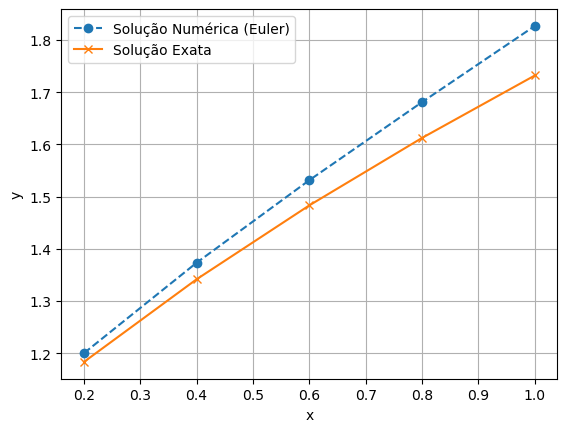

In [14]:
#plota grafico
plot_euler_vs_exact(results, y_exact, "euler_grafico.png")

In [18]:
# Solução usando Runge-Kutta de 3ª ordem
y_rk3 = runge_kutta_3rd_order(f, x0, y0, h, n)

In [19]:
# Solução exata para y(1)
y_exact = math.sqrt(2 * 1 + 1)

In [20]:
# Calculando o erro absoluto
erro_euler = abs(y_exact - y_euler)
erro_rk3 = abs(y_exact - y_rk3)

print(f"Valor de y(1) usando Método de Euler: {y_euler}")
print(f"Valor de y(1) usando Runge-Kutta de 3ª ordem: {y_rk3}")
print(f"Solução exata de y(1): {y_exact}")
print(f"Erro absoluto no Método de Euler: {erro_euler}")
print(f"Erro absoluto no Método de Runge-Kutta de 3ª ordem: {erro_rk3}")

Valor de y(1) usando Método de Euler: 1.8269481804182377
Valor de y(1) usando Runge-Kutta de 3ª ordem: 1.7324718336701308
Solução exata de y(1): 1.7320508075688772
Erro absoluto no Método de Euler: 0.0948973728493605
Erro absoluto no Método de Runge-Kutta de 3ª ordem: 0.0004210261012536076


### Questão 2: Movimento de um projétil
Calcular a velocidade de um projétil considerando a resistência do ar e encontrar o tempo no qual o projétil começa a cair.

#### Código para Simulação do Movimento

In [21]:
def projectile_velocity(m, g, k, v0, dt, t_final):
    t = 0
    v = v0
    while t <= t_final:
        # dv é calculado de acordo com a equação diferencial dada
        dv = (g - (k/m) * v * abs(v)) * dt
        v += dv ## DÚVIDA SE É PRA SOMAR OU SUBTRAIR
        t += dt
        print(f"Tempo: {t:.1f} s, Velocidade: {v:.4f} m/s")
        if v <= 0: ## DÚVIDA SE É < OU <=
            print(f"O projétil começa a cair após {t:.2f} segundos.")
            break

In [22]:
# Parâmetros
m = 0.11  # massa do projétil em kg
g = -9.8  # aceleração da gravidade em m/s^2
k = 0.002  # coeficiente de resistência do ar em kg/m
v0 = 8  # velocidade inicial em m/s
dt = 0.1  # intervalo de tempo em segundos
t_final = 1  # tempo final em segundos

projectile_velocity(m, g, k, v0, dt, t_final)

Tempo: 0.1 s, Velocidade: 6.9036 m/s
Tempo: 0.2 s, Velocidade: 5.8370 m/s
Tempo: 0.3 s, Velocidade: 4.7950 m/s
Tempo: 0.4 s, Velocidade: 3.7732 m/s
Tempo: 0.5 s, Velocidade: 2.7673 m/s
Tempo: 0.6 s, Velocidade: 1.7734 m/s
Tempo: 0.7 s, Velocidade: 0.7877 m/s
Tempo: 0.8 s, Velocidade: -0.1934 m/s
O projétil começa a cair após 0.80 segundos.


### Questão 3: Crescimento Populacional
Calcular a população estimada depois de 5 anos utilizando Runge-Kutta de ordem 4.

#### Código para Métodos de Runge-Kutta

In [23]:
# Definindo a função f(t, P) que representa a taxa de variação dP/dt
def dP_dt(P, b, k):
    return b * P - k * P**2

In [24]:
# Método de Runge-Kutta de quarta ordem
def runge_kutta_4(P0, b, k, t_final, h):
    t = 0
    P = P0
    
    while t < t_final:
        # Coeficientes de Runge-Kutta
        k1 = h * dP_dt(P, b, k)
        k2 = h * dP_dt(P + 0.5 * k1, b, k)
        k3 = h * dP_dt(P + 0.5 * k2, b, k)
        k4 = h * dP_dt(P + k3, b, k)
        
        # Atualiza a população
        P += (k1 + 2*k2 + 2*k3 + k4) / 6
        
        # Atualiza o tempo
        t += h
    
    return P

In [25]:
# Parâmetros
P0 = 50976  # População inicial
b = 2.9e-2  # Taxa de nascimentos
k = 1.4e-7  # Constante de mortalidade proporcional
t_final = 5  # Tempo final em anos
h = 0.1  # Passo de tempo

In [26]:
# Calculando a população estimada após 5 anos
P_estimada = runge_kutta_4(P0, b, k, t_final, h)
print(f"População estimada após {t_final} anos: {P_estimada:.2f} indivíduos")

População estimada após 5 anos: 56870.60 indivíduos
